In [7]:
%matplotlib inline
import numpy as np
import pylab as plt
import matplotlib.cm as cm
import matplotlib

from IPython.display import display
from IPython.display import Image

## Exercise 2

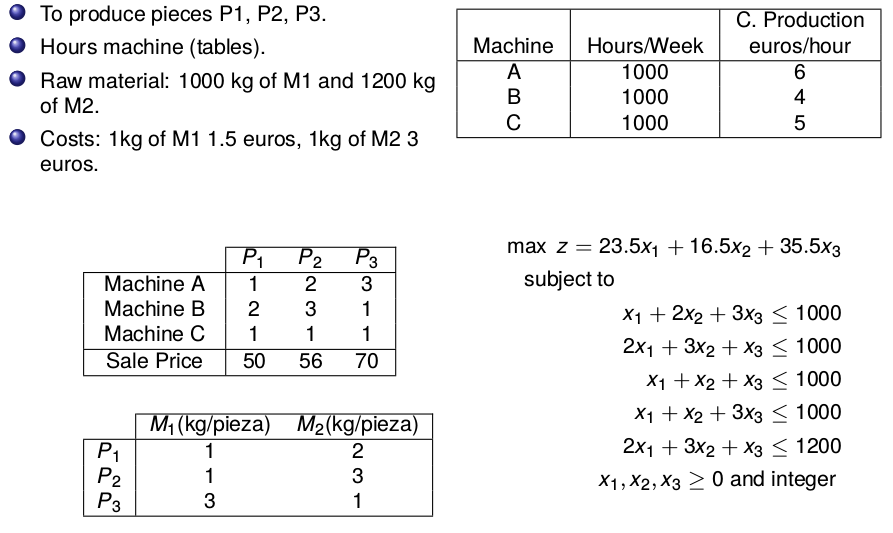

In [9]:
Image(filename='Production_Problem.png')

In [11]:
# Resolution using Pulp
import pulp

# Define the problem
problem = pulp.LpProblem("Exercise 2", pulp.const.LpMaximize)

X1 = pulp.LpVariable('X1', lowBound= 0, cat= 'Integer')
X2 = pulp.LpVariable('X2', lowBound= 0, cat= 'Integer')
X3 = pulp.LpVariable('X3', lowBound= 0, cat= 'Integer')

# Objective Function
problem += 23.5 * X1 + 16.5 * X2 + 35.5 * X3, 'z'

# Constraints
problem += X1   +   2*X2    +   3*X3    <= 1000
problem += 2*X1 +   3*X2    +   X3      <= 1000
problem += X1   +   X2      +   X3      <= 1000
problem += X1   +   X2      +   3*X3    <= 1000
problem += 2*X1 +   3*X2    +   X3      <= 1200

# Solve the problem
problem.solve()

print(f"The status of the solution found is: {pulp.LpStatus[problem.status]}")
for i, x in enumerate(problem.variables()):
    print(f"Optimal value for {x.name} = {x.varValue}")
print(f"Optimal solution Z = {pulp.value(problem.objective)}")




Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/ag6154lk/KISA/.venv/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/fc37d14f332542e196e93acb35150ec9-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/fc37d14f332542e196e93acb35150ec9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 10 COLUMNS
At line 35 RHS
At line 41 BOUNDS
At line 45 ENDATA
Problem MODEL has 5 rows, 3 columns and 15 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 16500 - 0.00 seconds
Cgl0004I processed model has 4 rows, 3 columns (3 integer (0 of which binary)) and 12 elements
Cutoff increment increased from 1e-05 to 0.4999
Cbc0012I Integer solution of -16500 found by DiveCoefficient after 0 iterations and 0 nodes (0.00 seconds)
Cbc0001I Search completed - best objective -16500, took 0 iterations and 0 nodes (0.00 seconds)

/home/ag6154lk/KISA/.venv/lib/python3.12/site-packages/pulp/pulp.py:1298: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [13]:
# Resolution using Pyomo
from pyomo.environ import AbstractModel, NonNegativeIntegers, Set, Var, Objective, Constraint, maximize
from pyomo.opt import SolverFactory, SolverManagerFactory
import os

# Define the problem
model = AbstractModel()
model.I = Set(initialize = [1, 2, 3])
model.x = Var(model.I, within= NonNegativeIntegers)

# Define the objective function
def objective_function(model):
    return 23.5 * model.x[1] + 16.5 * model.x[2] + 35.5 * model.x[3]
model.cost = Objective(rule = objective_function, sense = maximize)

# Define constraints
def constraint_1(model):
    return model.x[1] + 2*model.x[2] + 3*model.x[3] <= 1000
model.c1 = Constraint(rule = constraint_1)

def constraint_2(model):
    return 2*model.x[1] + 3*model.x[2] + model.x[3] <= 1000
model.c2 = Constraint(rule = constraint_2)

def constraint_3(model):
    return model.x[1] + model.x[2] + model.x[3] <= 1000
model.c3 = Constraint(rule = constraint_3)

def constraint_4(model):
    return model.x[1] + model.x[2] + 3*model.x[3] <= 1000
model.c4 = Constraint(rule = constraint_4)

def constraint_5(model):
    return 2*model.x[1] + 3*model.x[2] + model.x[3] <= 1200
model.c5 = Constraint(rule = constraint_5)

# Solve the problem with remote solver
instance = model.create_instance()

opt = SolverFactory("ipopt")
solver_manager = SolverManagerFactory('neos')
os.environ['NEOS_EMAIL'] = 'myemail@ehu.eus' 

results = solver_manager.solve(instance, opt = opt, load_solutions = False)
results.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.14.12\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 1
  number of solutions displayed: 1
- Status: optimal
  Message: Ipopt 3.14.12\x3a Op

## Exercise 3


A plant produces two types of refrigerators, A and B. There are two production lines, one dedicated to producing refrigerators of Type A, the other to producing refrigerators of Type B. The capacity of the production line for A is 60 units per day, the capacity of the production line for B is 50 units per day. A requires 20 minutes of labor whereas B requires 40 minutes of labor. Presently, there is a maximum of 40 hours of labor per day which can be assigned to either production line. Profit contributions are 20 dol. per refrigerator of Type A produced and 30 dol. per Type B produced. What should the daily production be? Show the space of feasible solutions and solve the problem using pyomo. 

In [22]:
%%latex
$x_1=$ \textit{How many refrigerators of type A} \\
$x_2=$ \textit{How many refrigerators of type B} \\

\begin{align*}
    \max \ z = 20 * x_1 + 30 * x_2 \\
    \text{subject to}& \\
    & x_1 \leq 60 \\
    & x_2 \leq 50 \\
    & 20 * x_1 + 40 * x_2 \leq 2400 \\
    &x_{1}, x_{2} \geq 0 \quad x_1, x_2 \in N
\end{align*}

<IPython.core.display.Latex object>

In [23]:
# Resolution using Pyomo
from pyomo.environ import AbstractModel, NonNegativeIntegers, Set, Var, Objective, Constraint, maximize
from pyomo.opt import SolverFactory, SolverManagerFactory
import os

# Define the problem
model = AbstractModel()
model.I = Set(initialize = [1, 2])
model.x = Var(model.I, within= NonNegativeIntegers)

# Define the objective function
def objective_function(model):
    return 20 * model.x[1] + 30 * model.x[2]
model.cost = Objective(rule = objective_function, sense = maximize)

# Define constraints
def constraint_1(model):
    return model.x[1] <= 60
model.c1 = Constraint(rule = constraint_1)

def constraint_2(model):
    return model.x[2] <= 50
model.c2 = Constraint(rule = constraint_2)

def constraint_3(model):
    return 20 * model.x[1] + 40 * model.x[2] <= 2400
model.c3 = Constraint(rule = constraint_3)

# Solve the problem with remote solver
instance = model.create_instance()

opt = SolverFactory("ipopt")
solver_manager = SolverManagerFactory('neos')
os.environ['NEOS_EMAIL'] = 'myemail@ehu.eus' 

results = solver_manager.solve(instance, opt = opt, load_solutions = False)
results.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 2
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.14.12\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 1
  number of solutions displayed: 1
- Status: optimal
  Message: Ipopt 3.14.12\x3a Op